<a href="https://colab.research.google.com/github/alvinadar/Heart-Disease-Prediction/blob/main/Evaluation_Classification_HeartDisease_Dataset_LogisticRegression_DecisionTree_RandomForest(GitHub).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification_LogisticRegression_DecisionTree_RandomForest**

This dataset is about whether a person has a heart problem or not. We will be using classifier method to generate the model from this dataset and evaluate it. We will be using Logistic Regression, Decision Tree classifier and Random Forest Classifier.

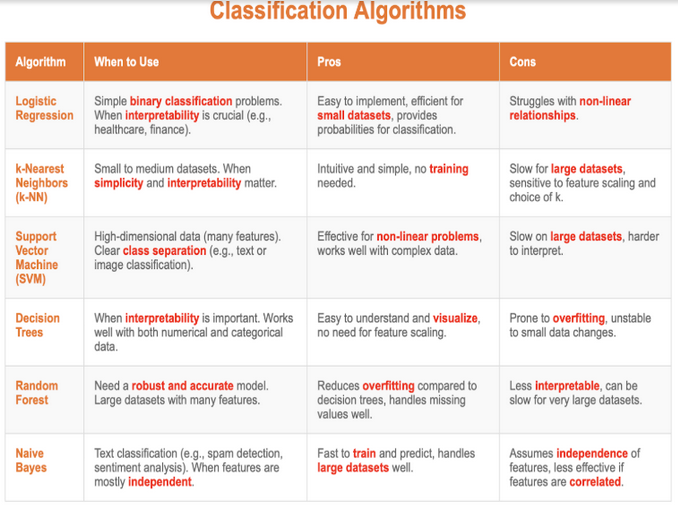

We are using Logistic Regression because this is small dataset (with data approximately about 1K). We are using Decision Trees because we need good interpretability and the data need to be easy to understand. We are trying Random Forest because we need a robust and accurate model.

# **Logistic Regression**

# 1.0 Import necessary libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart_disease.csv")

# 2.0 Clean data

In [ ]:
len(df)

1024

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target_binary
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6.0,0,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3.0,2,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7.0,1,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3.0,0,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3.0,0,0
5,56.0,1,2,120.0,236.0,0,0,178.0,0,0.8,1,0.0,3.0,0,0
6,62.0,0,4,140.0,268.0,0,2,160.0,0,3.6,3,2.0,3.0,3,1
7,57.0,0,4,120.0,354.0,0,0,163.0,1,0.6,1,0.0,3.0,0,0
8,63.0,1,4,130.0,254.0,0,2,147.0,0,1.4,2,1.0,7.0,2,1
9,53.0,1,4,140.0,203.0,1,2,155.0,1,3.1,3,0.0,7.0,1,1


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'target_binary'],
      dtype='object')

# **Understanding the data domain**

1.) **num** = severity of heart dicease (0-4)

2.) **target_binary**=yes/no,1=yes,0=no, have heart dicease or not

3.) **thal**=thalassemia test(stress test on how blood flows through the heart)(1 or 3 and 6 or 7)

4.) **ca**=number of major coronary arteries that are visible during fluroscopy scan(0-3)

5.) **slope**=the shape or direction the ST segment during peak exercise (S wave and T wave) on an ECG (1-3), ECG or EKG, is a test that records the electrical activity of the heart.

6.) **oldpeak**= ST depression (0-high value),The ST segment encompasses the region between the end of ventricular depolarization and beginning of ventricular repolarization on the ECG.

7.) **exang**=Exercise induced Angina , indicating whether the person experienced chest pain (angina) during exercise(0-1)

8.) **thalach**=is a nmeric feature indicating maximum heart rate that the patient achieved during exercise stress testing(more than 0)

9.) **restecg**=ECG readings taken at rest,before exercise(0-2)

10.) **fbs**=fasting blood sugar,0<=120mg/dL,1>=120mg/dL (0-1)

11.) **chol**=cholesterol(must have value)

12.) **trestbps**=resting systolic blood pressure (must have value)

13.) **cp**=types of chest pain (1-4)

14.) **sex**=-->0=Female, 1=Male


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df['age'].unique()

array([63.        , 67.        , 37.        , 41.        , 56.        ,
       62.        , 57.        , 53.        , 44.        , 52.        ,
       48.        , 54.        , 49.        , 64.        , 58.        ,
       60.        , 50.        , 66.        , 43.        , 40.        ,
       69.        , 59.        , 42.        , 55.        , 61.        ,
       65.        , 71.        , 51.        , 46.        , 45.        ,
       39.        , 68.        , 47.        , 34.        , 35.        ,
       29.        , 70.        , 77.        , 38.        , 74.        ,
       76.        , 62.55531427, 29.86932529, 69.66659592, 47.30775596,
       49.14238029, 39.33356462, 51.93832791, 41.39486156, 59.76734266,
       34.55445084, 51.49140812, 44.82677337, 49.28083474, 53.44900522,
       53.46646199, 36.59733738, 61.44411114, 52.11523358, 59.42324213,
       59.33088235, 71.35495692, 48.84143955, 68.06194848, 47.41990856,
       61.20350193, 41.47226312, 52.25314109, 60.06364886, 53.38

In [ ]:
df['sex'].unique()

array([1, 0])

In [ ]:
df['cp'].unique()

array([1, 4, 3, 2])

In [ ]:
df['trestbps'].unique()

array([145.        , 160.        , 120.        , 130.        ,
       140.        , 172.        , 150.        , 110.        ,
       132.        , 117.        , 135.        , 112.        ,
       105.        , 124.        , 125.        , 142.        ,
       128.        , 170.        , 155.        , 104.        ,
       180.        , 138.        , 108.        , 134.        ,
       122.        , 115.        , 118.        , 100.        ,
       200.        ,  94.        , 165.        , 102.        ,
       152.        , 101.        , 126.        , 174.        ,
       148.        , 178.        , 158.        , 192.        ,
       129.        , 144.        , 123.        , 136.        ,
       146.        , 106.        , 156.        , 154.        ,
       114.        , 164.        , 143.10811134, 125.35246638,
       123.78794581,  98.97311912, 126.22082677, 106.13110038,
       125.31569939, 123.82108809, 146.56506978, 121.62422525,
       106.62598246, 143.71067379, 116.98186729, 142.23

In [ ]:
df['chol'].unique()

array([233.        , 286.        , 229.        , 250.        ,
       204.        , 236.        , 268.        , 354.        ,
       254.        , 203.        , 192.        , 294.        ,
       256.        , 263.        , 199.        , 168.        ,
       239.        , 275.        , 266.        , 211.        ,
       283.        , 284.        , 224.        , 206.        ,
       219.        , 340.        , 226.        , 247.        ,
       167.        , 230.        , 335.        , 234.        ,
       177.        , 276.        , 353.        , 243.        ,
       225.        , 302.        , 212.        , 330.        ,
       175.        , 417.        , 197.        , 198.        ,
       290.        , 253.        , 172.        , 273.        ,
       213.        , 305.        , 216.        , 304.        ,
       188.        , 282.        , 185.        , 232.        ,
       326.        , 231.        , 269.        , 267.        ,
       248.        , 360.        , 258.        , 308.  

In [ ]:
df['fbs'].unique()

array([1, 0])

In [ ]:
df['restecg'].unique()

array([2, 0, 1])

In [ ]:
df['thalach'].unique()

array([150.        , 108.        , 129.        , 187.        ,
       172.        , 178.        , 160.        , 163.        ,
       147.        , 155.        , 148.        , 153.        ,
       142.        , 173.        , 162.        , 174.        ,
       168.        , 139.        , 171.        , 144.        ,
       132.        , 158.        , 114.        , 151.        ,
       161.        , 179.        , 120.        , 112.        ,
       137.        , 157.        , 169.        , 165.        ,
       123.        , 128.        , 152.        , 140.        ,
       188.        , 109.        , 125.        , 131.        ,
       170.        , 113.        ,  99.        , 177.        ,
       141.        , 180.        , 111.        , 143.        ,
       182.        , 156.        , 115.        , 149.        ,
       145.        , 146.        , 175.        , 186.        ,
       185.        , 159.        , 130.        , 190.        ,
       136.        ,  97.        , 127.        , 154.  

In [ ]:
df['exang'].unique()

array([0, 1])

In [ ]:
df['oldpeak'].unique()

array([2.30000000e+00, 1.50000000e+00, 2.60000000e+00, 3.50000000e+00,
       1.40000000e+00, 8.00000000e-01, 3.60000000e+00, 6.00000000e-01,
       3.10000000e+00, 4.00000000e-01, 1.30000000e+00, 0.00000000e+00,
       5.00000000e-01, 1.60000000e+00, 1.00000000e+00, 1.20000000e+00,
       2.00000000e-01, 1.80000000e+00, 3.20000000e+00, 2.40000000e+00,
       2.00000000e+00, 2.50000000e+00, 2.20000000e+00, 2.80000000e+00,
       3.00000000e+00, 3.40000000e+00, 6.20000000e+00, 4.00000000e+00,
       5.60000000e+00, 2.90000000e+00, 1.00000000e-01, 2.10000000e+00,
       1.90000000e+00, 4.20000000e+00, 9.00000000e-01, 1.10000000e+00,
       3.80000000e+00, 7.00000000e-01, 3.00000000e-01, 4.40000000e+00,
       8.40793990e-01, 4.33397595e-01, 1.27238813e+00, 1.34703977e+00,
       3.04694665e-01, 8.77512985e-01, 1.15356579e+00, 9.95940231e-01,
       1.88749753e+00, 1.63490618e-01, 1.29888523e+00, 4.46915232e-01,
       1.11949251e+00, 1.82920700e+00, 2.34047608e-01, 7.20433465e-01,
      

In [ ]:
df['slope'].unique()

array([3, 2, 1])

In [ ]:
df['ca'].unique()

array([0., 3., 2., 1.])

In [ ]:
df['thal'].unique()

array([6., 3., 7.])

In [ ]:
df['num'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
df['target_binary'].unique()

array([0, 1])

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target_binary
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6.0,0,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3.0,2,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7.0,1,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3.0,0,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3.0,0,0


# 3.0 Define X and y

In [ ]:
X = df.drop('target_binary',axis=1)
y = df['target_binary']

# 4.0 Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 5.0 Create Model

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

# 6.0 Make prediction and evaluate the model

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)#Compare the actual data (y_test) and (y_pred)
print(f"The overall accuracy score of the model is {accuracy:.12f}")

The overall accuracy score of the model is 0.995121951220


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

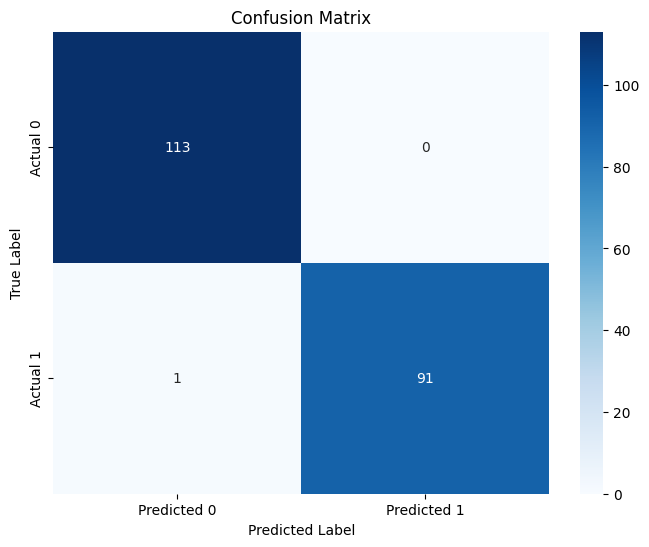

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
scores = cross_val_score(model,X,y,cv=kfold)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print("Cross-validation scores: ", np.round(scores,12))

Cross-validation scores:  [0.99512195 1.         1.         1.         1.        ]


In [ ]:
print("Average cross-validation score: ", np.round(scores.mean(),12))

Average cross-validation score:  0.999024390244


In [ ]:
new_data=[[67,1,3,150,285,0,1,110,1,2,2,3,3,1]]
y_pred = model.predict(new_data)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

# Precision, Recall, F1-Score

In [ ]:
print(len(y_test), len(y_pred))

205 1


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(len(y_test), len(y_pred))

205 205


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_true=y_test
precision_score(y_true, y_pred)
recall_score(y_true, y_pred)
f1_score(y_true, y_pred)

0.994535519125683

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       113
           1       1.00      0.99      0.99        92

    accuracy                           1.00       205
   macro avg       1.00      0.99      1.00       205
weighted avg       1.00      1.00      1.00       205



# f1_score is 0.994535519125683

# **Desicion Tree Classifier**

Understanding domain data:

1.) **num** = severity of heart dicease (0-4)

2.) **target_binary**=yes/no,1=yes,0=no, have heart dicease or not

3.) **thal**=thalassemia test(stress test on how blood flows through the heart)(1 or 3 and 6 or 7)

4.) **ca**=number of major coronary arteries that are visible during fluroscopy scan(0-3)

5.) **slope**=the shape or direction the ST segment during peak exercise (S wave and T wave) on an ECG (1-3), ECG or EKG, is a test that records the electrical activity of the heart.

6.) **oldpeak**= ST depression (0-high value),The ST segment encompasses the region between the end of ventricular depolarization and beginning of ventricular repolarization on the ECG.

7.) **exang**=Exercise induced Angina , indicating weather the person experienced chest pain (angina) during exercise(0-1)

8.) **thalach**=is a nmeric feature indicating maximum heart rate that the patient achieved during exercise stress testing(more than 0)

9.) **restecg**=ECG readings taken at rest,before exercise(0-2)

10.) **fbs**=fasting blood sugar,0<=120mg/dL,1>=120mg/dL (0-1)

11.) **chol**=cholesterol(must have value)

12.) **trestbps**=resting systolic blood pressure (must have value)

13.) **cp**=types of chest pain (1-4)

14.) **sex**=-->0=Female, 1=Male


# **1.0 Import necessary libraries**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# For splitting data into train and test
from sklearn.model_selection import train_test_split

# For measuring performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart_disease.csv")

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target_binary
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6.0,0,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3.0,2,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7.0,1,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3.0,0,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3.0,0,0


# **2.0 Define X and y**

In [ ]:
X = df.drop('target_binary',axis=1)
y = df['target_binary']

# **3.0 Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# **4.0 Create Model**

In [ ]:
model = DecisionTreeClassifier(criterion='gini',max_depth=None,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

# **5.0 Make prediction and evaluate the model**

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)#Compare the actual data (y_test) and (y_pred)
print(f"The overall accuracy score of the model is {accuracy:.12f}")

The overall accuracy score of the model is 1.000000000000


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

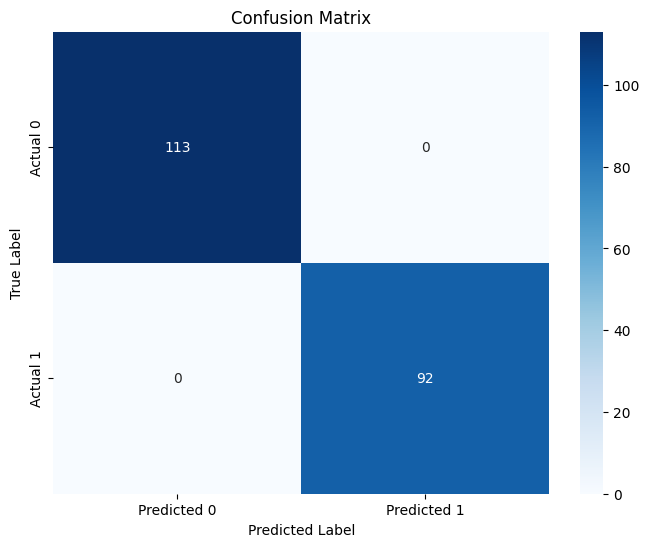

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
scores = cross_val_score(model,X,y,cv=kfold)

In [ ]:
print("Cross-validation scores: ", np.round(scores,12))

Cross-validation scores:  [1. 1. 1. 1. 1.]


In [ ]:
print("Average cross-validation score: ", np.round(scores.mean(),12))

Average cross-validation score:  1.0


In [ ]:
new_data=[[67,1,3,150,285,0,1,110,1,2,2,3,3,1]]
y_pred = model.predict(new_data)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# Precision, Recall, F1-score

In [ ]:
print(len(y_test), len(y_pred))

205 1


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(len(y_test), len(y_pred))

205 205


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_true=y_test
precision_score(y_true, y_pred)
recall_score(y_true, y_pred)
f1_score(y_true, y_pred)

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        92

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



# f1_score is 1.0

# **Random Forest Classifier**

# Understanding Data Domain

Understanding domain data:

1.) **num** = severity of heart dicease (0-4)

2.) **target_binary**=yes/no,1=yes,0=no, have heart dicease or not

3.) **thal**=thalassemia test(stress test on how blood flows through the heart)(1 or 3 and 6 or 7)

4.) **ca**=number of major coronary arteries that are visible during fluroscopy scan(0-3)

5.) **slope**=the shape or direction the ST segment during peak exercise (S wave and T wave) on an ECG (1-3), ECG or EKG, is a test that records the electrical activity of the heart.

6.) **oldpeak**= ST depression (0-high value), The ST segment encompasses the region between the end of ventricular depolarization and beginning of ventricular repolarization on the ECG.

7.) **exang**=Exercise induced Angina , indicating weather the person experienced chest pain (angina) during exercise(0-1)

8.) **thalach**=is a nmeric feature indicating maximum heart rate that the patient achieved during exercise stress testing(more than 0)

9.) **restecg**=ECG readings taken at rest,before exercise(0-2)

10.) **fbs**=fasting blood sugar,0<=120mg/dL,1>=120mg/dL (0-1)

11.) **chol**=cholesterol(must have value)

12.) **trestbps**=resting systolic blood pressure (must have value)

13.) **cp**=types of chest pain (1-4)

14.) **sex**=-->0=Female, 1=Male


# **1.0 Import necessary libraries**

In [ ]:
# Build and train the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart_disease.csv")

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target_binary
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6.0,0,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3.0,2,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7.0,1,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3.0,0,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3.0,0,0


# **2.0 Define X and y**

In [ ]:
X = df.drop('target_binary',axis=1)
y = df['target_binary']

# **3.0 Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# **4.0 Create Model**

In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

# **5.0 Make prediction and evaluate the model**

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)#Compare the actual data (y_test) and (y_pred)
print(f"The overall accuracy score of the model is {accuracy:.12f}")

The overall accuracy score of the model is 1.000000000000


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

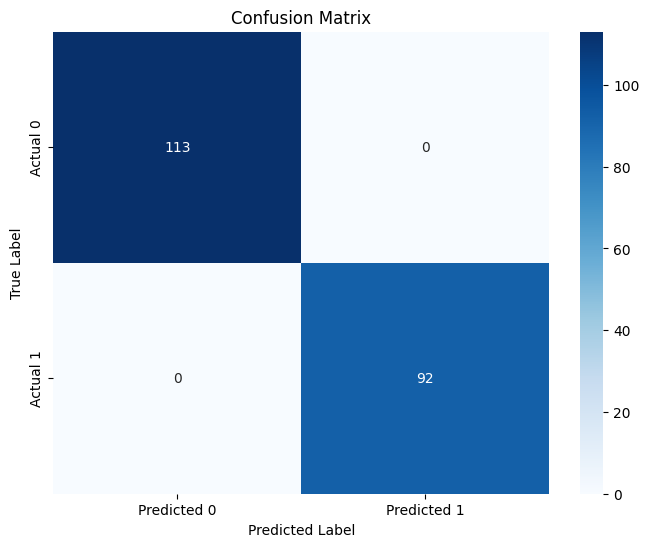

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
scores = cross_val_score(rf,X,y,cv=kfold)

In [ ]:
print("Cross-validation scores: ", np.round(scores,12))

Cross-validation scores:  [1. 1. 1. 1. 1.]


In [ ]:
print("Average cross-validation score: ", np.round(scores.mean(),12))

Average cross-validation score:  1.0


In [ ]:
new_data=[[67,1,3,150,285,0,1,110,1,2,2,3,3,1]]
y_pred = rf.predict(new_data)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

# Precision, Recall, F1-score

In [ ]:
print(len(y_test), len(y_pred))

205 1


In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(len(y_test), len(y_pred))

205 205


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_true=y_test
precision_score(y_true, y_pred)
recall_score(y_true, y_pred)
f1_score(y_true, y_pred)

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        92

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



# f1_score is 1.0

# **Decision Tree Classifier and Random Forest Classifier shows high accuracy score value, high average cv score value and high f1_score**